In [1]:
# importing necessary libraries
# Didarul
import matplotlib.pyplot as plt
import numpy as np
import Orange
import pandas as pd
from graphviz import Digraph
from Orange.preprocess import Impute
from pandas_profiling import ProfileReport


plt.style.use("ggplot")
# Load training dataset
dfm = pd.read_csv('train.csv')
# dfm.describe() # Visualize

# Load testing dataset
tst = pd.read_csv('test.csv')
# test.describe() # Visualize

bm = pd.read_csv('svm_benchmark.csv')
p_svmbm = bm['Pred_bm']
# Separate labels from training dataset for fitting
labels = dfm['Activity']
del dfm['Activity']


bench = np.array(p_svmbm)

In [2]:
### SVM
# https://scikit-learn.org/stable/modules/svm.html
# Didarul
from sklearn import svm

sss = svm.SVC()
sss.fit(dfm, labels)

pred_svm = np.array(sss.predict(tst))

pred_svm

array([1, 1, 0, ..., 1, 1, 0])

In [4]:
# performance analysis of SVM with respect to the benchmark
# Didarul
tp=0
tn=0
fp=0
fn=0


for i in range(len(bench)):
    if ((bench[i]==1)&(pred_svm[i]==1)):
        tp=tp+1
    elif ((bench[i]==0)&(pred_svm[i]==0)):
        tn=tn+1
    elif ((bench[i]==0)&(pred_svm[i]==1)):
        fp=fp+1
    else:
        fn=fn+1
            
### print(tp,tn,fp,fn)
pr = tp/(tp+fp)
rc = tp/(tp+fn)
f1 = (2*pr*rc)/(pr+rc)
ca = (tp+tn)/(tp+tn+fp+fn)
sp=tn/(tn+fp)

print('TP:',tp,'TN:',tn,'FP:',fp,'FN:',fn,'Precision:', pr, 'Recall:', rc, 'F1:', f1, 'Acc:', ca, 'Spe:', sp)

TP: 1299 TN: 917 FP: 181 FN: 104 Precision: 0.8777027027027027 Recall: 0.9258731290092659 F1: 0.9011446409989594 Acc: 0.8860455817672931 Spe: 0.8351548269581056


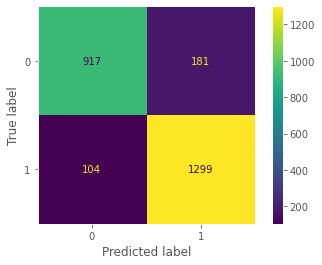

In [5]:
# Didarul
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm=confusion_matrix(bench, pred_svm)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.grid(False)
plt.show()

In [6]:
### Linear Regression: Sebastian

import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 


# Load training dataset
df1 = pd.read_csv('train.csv')
#df1.head() # Visualize
#df1['D1'].plot() # Visualize
#df1['D2'].plot() # Visualize
df1.describe() # Visualize

# Load testing dataset
test = pd.read_csv('test.csv')
# test.describe() # Visualize

# Separate labels from training dataset for fitting
labels = df1['Activity']
del df1['Activity']


# Fit a Logistic regression classifier
clf = sklearn.linear_model.LogisticRegression(max_iter=1000)
clf.fit(df1, labels)

pred_lr = np.array(clf.predict(tst))

pred_lr

array([1, 1, 0, ..., 1, 1, 1])

In [7]:
### Comparison of LR (model 1) and SVM (model 2)
# Didarul
tp=0
tn=0
fp=0
fn=0

for i in range(len(bench)):
    if ((bench[i]==1)&(pred_lr[i]==1)):
        tp=tp+1
    elif ((bench[i]==0)&(pred_lr[i]==0)):
        tn=tn+1
    elif ((bench[i]==0)&(pred_lr[i]==1)):
        fp=fp+1
    else:
        fn=fn+1
            
###print(tp,tn,fp,fn)
pr = tp/(tp+fp)
rc = tp/(tp+fn)
f1 = (2*pr*rc)/(pr+rc)
ca = (tp+tn)/(tp+tn+fp+fn)
sp=tn/(tn+fp)

print('TP:',tp,'TN:',tn,'FP:',fp,'FN:',fn,'Precision:', pr, 'Recall:', rc, 'F1:', f1, 'Acc:', ca, 'Spe:', sp)

TP: 1208 TN: 870 FP: 228 FN: 195 Precision: 0.841225626740947 Recall: 0.8610121168923734 F1: 0.8510038746037337 Acc: 0.8308676529388245 Spe: 0.7923497267759563


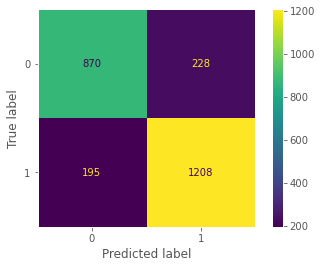

In [8]:
# Didarul
cm1=confusion_matrix(bench, pred_lr)
cm1

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)

disp.plot()
plt.grid(False)
plt.show()